In [6]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

#Initialize taxi environment
env = gym.make("Taxi-v3")  # No render_mode to avoid GUI during training
state, _ = env.reset()

n_actions = env.action_space.n
n_states = env.observation_space.n
print(f"Observation space: {n_states}, Action space: {n_actions}")

Observation space: 500, Action space: 6


In [7]:
#Initialize Q-table
Q = np.zeros((n_states, n_actions))

# Hyperparameters
alpha = 0.7        # Learning rate
gamma = 0.95       # Discount factor
epsilon = 1.0      # Exploration probability
epsilon_decay = 0.995
epsilon_min = 0.01
episodes = 2000
max_steps = 200

In [8]:
#Q-Learning training
all_rewards = []

for ep in range(episodes):
    state, _ = env.reset() #Random taxi, passenger, and destination positions
    done = False
    total_reward = 0

    for t in range(max_steps):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Q-Learning update
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )

        state = next_state
        total_reward += reward

        if done:
            break

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    all_rewards.append(total_reward)

    if (ep+1) % 200 == 0:
        print(f"Episode {ep+1}, Total reward: {total_reward}, Epsilon: {epsilon:.3f}")

# Save Q-table for later use
np.save("q_table.npy", Q)

Episode 200, Total reward: -58, Epsilon: 0.367
Episode 400, Total reward: 11, Epsilon: 0.135
Episode 600, Total reward: 11, Epsilon: 0.049
Episode 800, Total reward: 9, Epsilon: 0.018
Episode 1000, Total reward: 15, Epsilon: 0.010
Episode 1200, Total reward: 5, Epsilon: 0.010
Episode 1400, Total reward: 3, Epsilon: 0.010
Episode 1600, Total reward: 11, Epsilon: 0.010
Episode 1800, Total reward: 5, Epsilon: 0.010
Episode 2000, Total reward: 6, Epsilon: 0.010


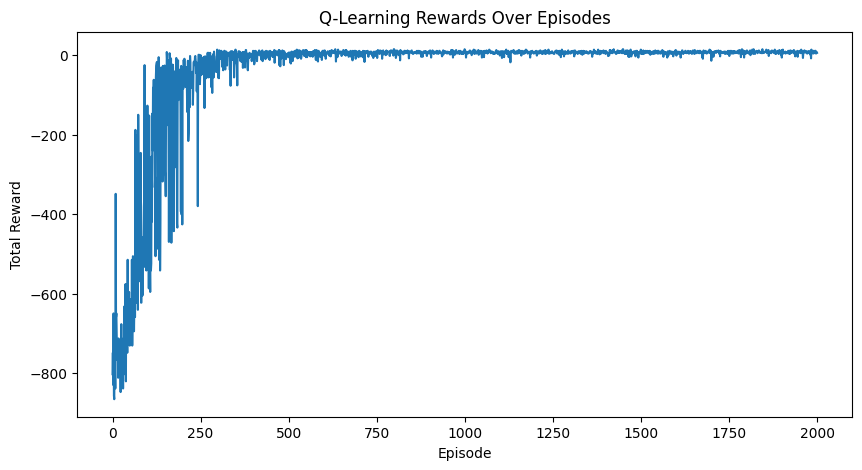

In [9]:
#Plot rewards
plt.figure(figsize=(10,5))
plt.plot(all_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Q-Learning Rewards Over Episodes")
plt.show()

In [ ]:
# Create environment with GUI for testing
test_env = gym.make("Taxi-v3", render_mode="human") #Enable display

# Random initial positions for testing
state, _ = test_env.reset()  # Passenger & destination randomized
done = False
total_reward = 0
steps = 0

print("\nTesting trained agent with GUI (random positions)...")
while not done:
    action = np.argmax(Q[state])
    state, reward, terminated, truncated, info = test_env.step(action)
    done = terminated or truncated
    total_reward += reward
    steps += 1

test_env.close()
print(f"Test finished in {steps} steps, total reward: {total_reward}")


Testing trained agent with GUI (random positions)...
Test finished in 14 steps, total reward: 7
